In [1]:
#!pip install torch torchvision
import torch
from torch import nn
from torch import optim

import numpy as np
from matplotlib import pyplot as plt

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

## Task 1: Linear case

Use perceptron to 

In [2]:
np.random.seed(42)
x_data = np.sort(-2. + 4. * np.random.rand(20))
y_data = 5. * x_data + 2.5 + np.random.randn(20)

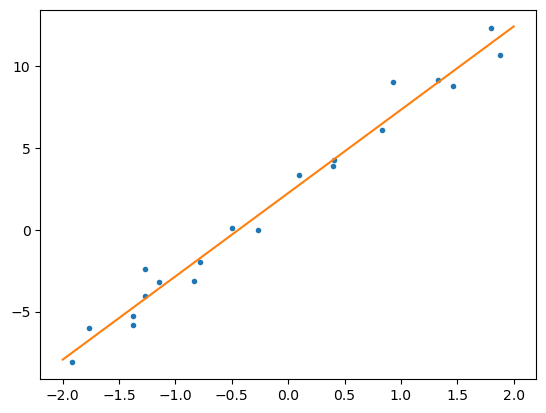

In [13]:
#TODO
x = x_data.reshape(20,-1).astype(np.float32)
x = torch.tensor(x)
y = y_data.reshape(20,-1).astype(np.float32)
y = torch.tensor(y)

model = nn.Linear(1,1, bias=True)
y_pred = model(x)

optimizer = optim.SGD(model.parameters(), lr = 0.1)
criteria = nn.MSELoss()

# Training 
for i in range(1000):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x)
    loss = criteria(y,y_pred)
    # Backward
    loss.backward()
    # update weights
    optimizer.step()


x_new = torch.tensor(np.linspace(-2.0, 2.0, 100).astype(np.float32))
x_new = x_new.reshape(-1,1)
y_new = model(x_new)

plt.plot(x_data, y_data, '.')
plt.plot(x_new, y_new.detach().numpy())
plt.show()

## Task 2: Non-Linear case

Design a 2 hidden layer neural network to predict the following synthetic dataset

In [13]:
# Generate synthetic data for number of hours spend on video games vs happiness level
np.random.seed(42)
hours = torch.linspace(0, 14, 100).view(-1, 1) # 100 numbers between 0 and 14
happiness = 10 + 2 * hours + 0.2*np.random.normal(0, 5, 100).astype(np.float32).reshape(-1,1) - 0.2 * hours**2
x = hours
y = happiness


In [14]:
#TODO
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(1, 6, bias=True)
        self.layer2 = nn.Linear(6, 6, bias=True)
        self.layer3 = nn.Linear(6, 1, bias=True)
    def forward(self,x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [15]:
model = MyModel()
optimizer = optim.SGD(model.parameters(), lr = 0.001)
criteria = nn.MSELoss()
num_epochs = 10000
for epoch in range(num_epochs + 1):
    y_pred = model.forward(x)
    loss = criteria(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print(f"Epoch: {epoch}/{num_epochs} | Loss: {loss.item()}")

Epoch: 0/10000 | Loss: 130.93154907226562
Epoch: 500/10000 | Loss: 9.209142684936523
Epoch: 1000/10000 | Loss: 4.766266822814941
Epoch: 1500/10000 | Loss: 3.001206159591675
Epoch: 2000/10000 | Loss: 2.3495607376098633
Epoch: 2500/10000 | Loss: 1.765109658241272
Epoch: 3000/10000 | Loss: 1.5377752780914307
Epoch: 3500/10000 | Loss: 1.5401740074157715
Epoch: 4000/10000 | Loss: 1.3664392232894897
Epoch: 4500/10000 | Loss: 1.1827129125595093
Epoch: 5000/10000 | Loss: 1.0971139669418335
Epoch: 5500/10000 | Loss: 1.0326379537582397
Epoch: 6000/10000 | Loss: 1.001438021659851
Epoch: 6500/10000 | Loss: 0.9402529001235962
Epoch: 7000/10000 | Loss: 0.925736665725708
Epoch: 7500/10000 | Loss: 0.8899032473564148
Epoch: 8000/10000 | Loss: 0.8848795890808105
Epoch: 8500/10000 | Loss: 0.8750236630439758
Epoch: 9000/10000 | Loss: 0.8356846570968628
Epoch: 9500/10000 | Loss: 0.8252773880958557
Epoch: 10000/10000 | Loss: 0.8225775361061096


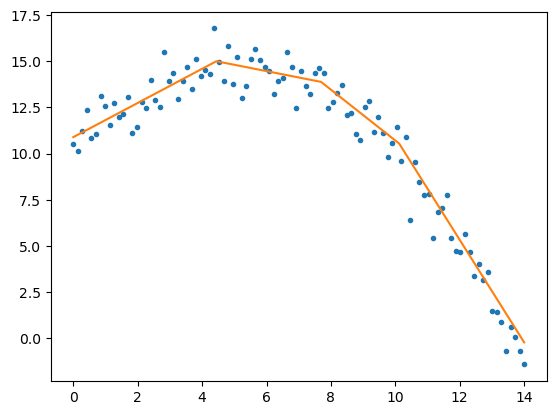

In [16]:
x_new = torch.tensor(np.linspace(0.0, 14.0, 1000).astype(np.float32))
x_new = x_new.reshape(-1,1)
y_new = model(x_new)

plt.figure()
plt.plot(x, y, '.')
plt.plot(x_new, y_new.detach().numpy())
plt.show()

## Task 3: MNIST Classification

Build a classifier to classify MNIST dataset

In [9]:
training_data = datasets.MNIST(
    root='~/Downloads/',
    train=True,
    download=True,
    transform=transforms.Compose([
              transforms.ToTensor()])
)
test_data = datasets.MNIST(
    root='~/Downloads/',
    train=False,
    download=True,
    transform=ToTensor()
)
batchsize = 64
train_dataloader = DataLoader(training_data, batch_size=batchsize, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=8, shuffle=True)

In [ ]:
#TODO
